# 2016 New Coder Survey

## Part I: Univariate Analysis

[Free Code Camp](https://www.freecodecamp.com/) and [Code Newbie](http://www.codenewbie.org/) surveyed more than 15000 people who are learning to code. They made the survey available via [Kaggle](https://www.kaggle.com/freecodecamp/2016-new-coder-survey-).

In this notebook, I'll deal with univariate analysis of the dataset.  
For multivariate analysis, check [Part II](./new_coders-part2.ipynb).

Table of contents:

* [Demographic](#Demographic)
* [Education](#Education)
* [Jobs and Employment](#Jobs-and-Employment)

## Imports and Settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

## Loading and Overview

In [4]:
df = pd.read_csv('./datasets/2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [5]:
df.shape

(15620, 113)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


Univariate analysis will be separated in several parts, each having similar topics grouped together.

## Demographic

### Age

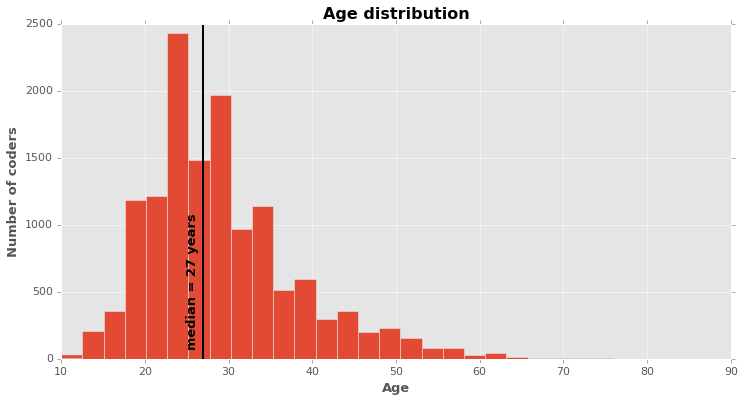

In [7]:
ax = df.Age.hist(bins=30)
_ = (ax.set_title('Age distribution'),
     ax.set_xlabel('Age'),
     ax.set_ylabel('Number of coders'))

age_median = df.Age.median()

_ = (ax.axvline(age_median, color='black', linewidth=2), 
     ax.text(age_median-0.5, 70, 
             'median = {:.0f} years'.format(age_median), 
             rotation=90, fontsize=13, fontweight='bold',
             horizontalalignment='right', verticalalignment='bottom'))

It seems there are some very young (less than 16 years old) people, and few 60+ people. Let's explore that a bit:

In [8]:
print("The youngest coder: \t{:.0f} years old\n"
      "The oldest coder: \t{:.0f} years old".format(df.Age.min(), df.Age.max()))

The youngest coder: 	10 years old
The oldest coder: 	86 years old


In [9]:
df.Age[df.Age < 16].value_counts(sort=False)

10.0      2
11.0      8
12.0     19
13.0     29
14.0     60
15.0    116
Name: Age, dtype: int64

In [10]:
df.Age[df.Age > 60].value_counts(sort=False)

61.0    17
62.0    15
63.0    10
64.0     3
65.0    10
66.0     5
67.0     2
68.0     2
69.0     3
70.0     5
71.0     1
72.0     2
73.0     2
75.0     3
80.0     1
86.0     1
Name: Age, dtype: int64

### Gender

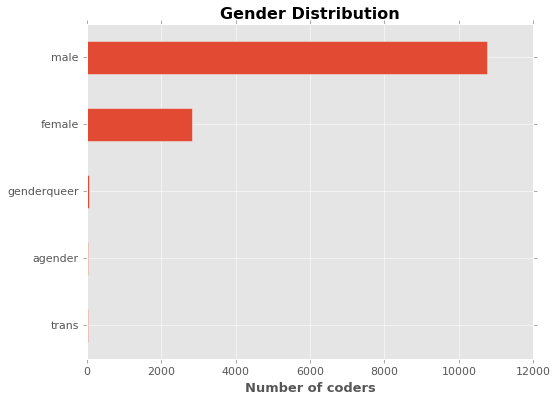

In [11]:
gender = df.Gender.value_counts(ascending=True)

ax = gender.plot(kind='barh', figsize=(8,6))
_ = (ax.set_title('Gender Distribution'),
     ax.set_xlabel('Number of coders'))

### Marital Status

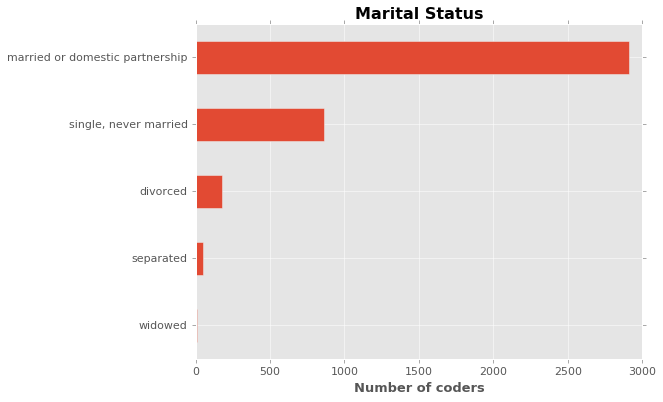

In [12]:
marital = df.MaritalStatus.value_counts(ascending=True)
ax = marital.plot(kind='barh', figsize=(8,6))

_ = (ax.set_title('Marital Status'),
     ax.set_xlabel('Number of coders'),
    )

### Children

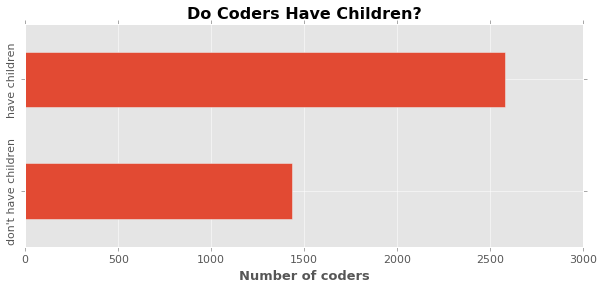

In [13]:
ax = df.HasChildren.value_counts(sort=False).plot(kind='barh', figsize=(10,4))
_ = (ax.set_title('Do Coders Have Children?'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["don't have children", 'have children'], rotation=90)
    )

It would seem like majority of coders have children, but only 1/4 of the coders answered the question.

How many children do they have?

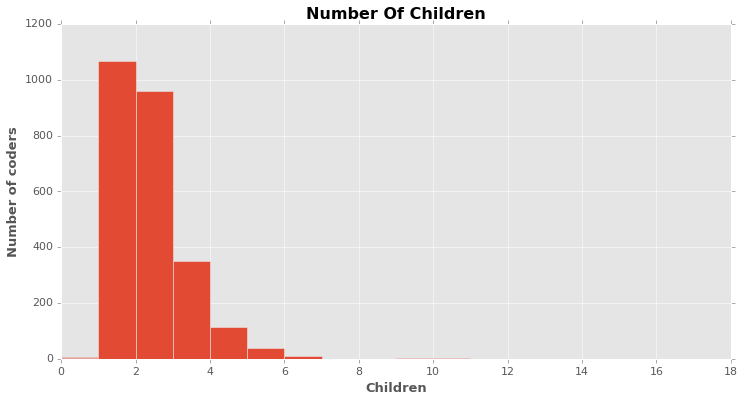

In [14]:
ax = df.ChildrenNumber.hist(bins=18)

_ = (ax.set_title('Number Of Children'),
     ax.set_xlabel('Children'),
     ax.set_ylabel('Number of coders'),
    )

### Financially Supporting

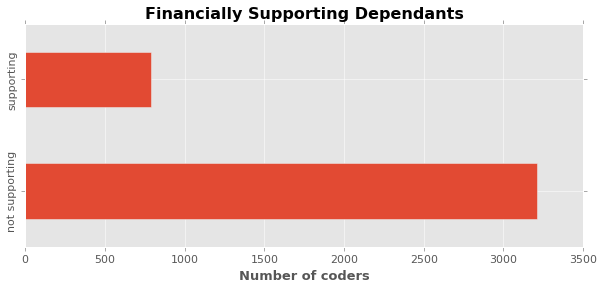

In [15]:
support = df.FinanciallySupporting.value_counts(sort=False)
ax = support.plot(kind='barh', figsize=(10,4))

_ = (ax.set_title('Financially Supporting Dependants'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["not supporting", 'supporting'], rotation=90)
    )

### City Population

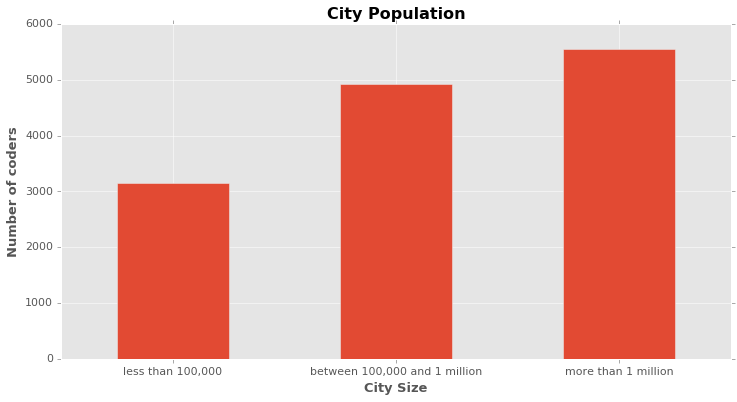

In [16]:
city = df.CityPopulation.value_counts(sort=True, ascending=True)

ax = city.plot(kind='bar', rot=0)
_ = (ax.set_title('City Population'), 
     ax.set_xlabel('City Size'), 
     ax.set_ylabel('Number of coders'))

### Country

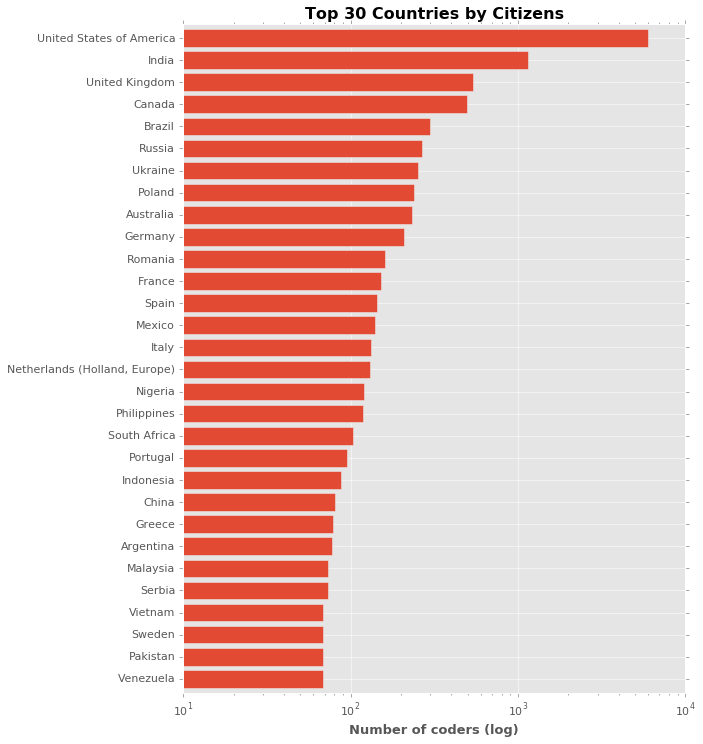

In [17]:
citizen = df.CountryCitizen.value_counts(ascending=True)[-30:]

ax = citizen.plot(kind='barh', figsize=(9,12), width=0.8, logx=True)
_ = (ax.set_title('Top 30 Countries by Citizens'), 
     ax.set_xlabel('Number of coders (log)'))

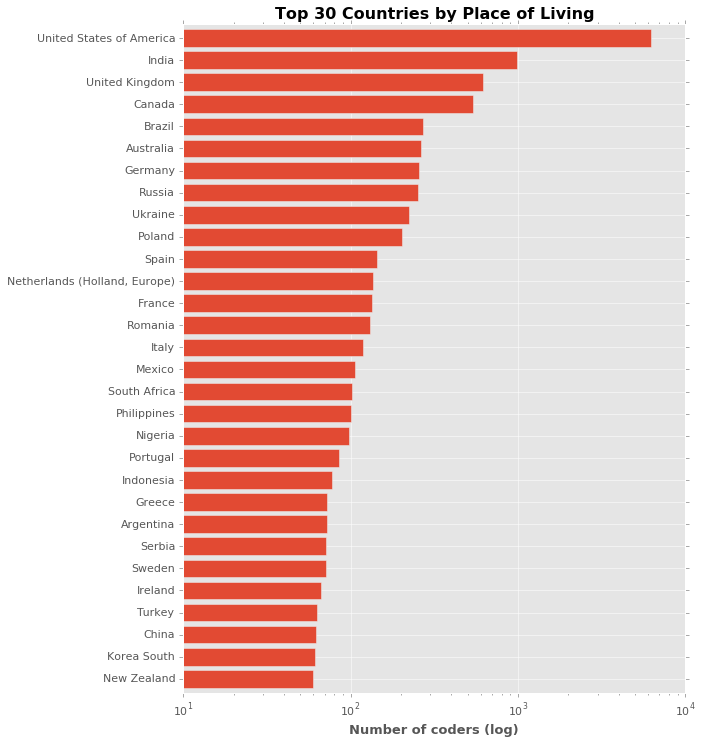

In [18]:
living = df.CountryLive.value_counts(ascending=True)[-30:]

ax = living.plot(kind='barh', figsize=(9,12), logx=True, width=0.8)
_ = (ax.set_title('Top 30 Countries by Place of Living'), 
     ax.set_xlabel('Number of coders (log)'))

### Language

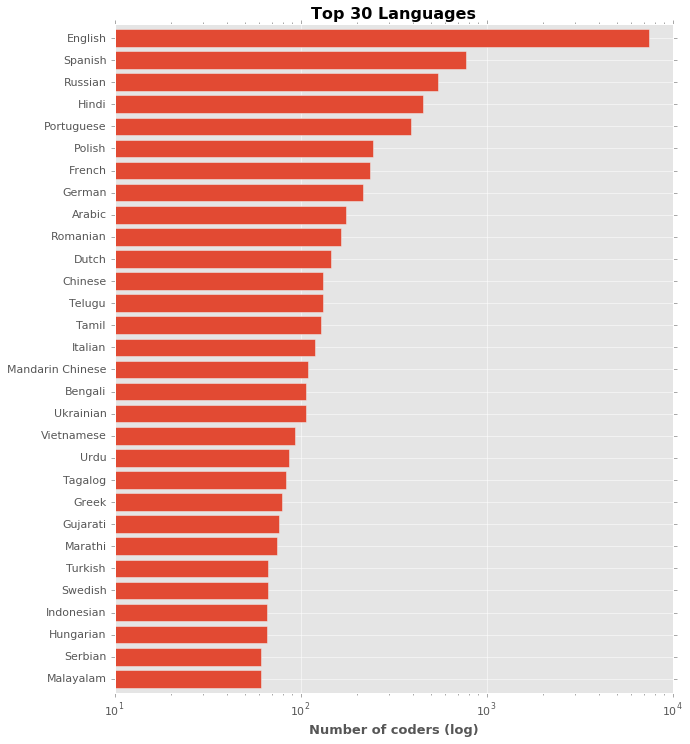

In [19]:
language = df.LanguageAtHome.value_counts(ascending=True)[-30:]
ax = language.plot(kind='barh', logx=True, width=0.8, figsize=(10,12))
_ = (ax.set_title('Top 30 Languages'), 
     ax.set_xlabel('Number of coders (log)'))

### Ethnic Minority

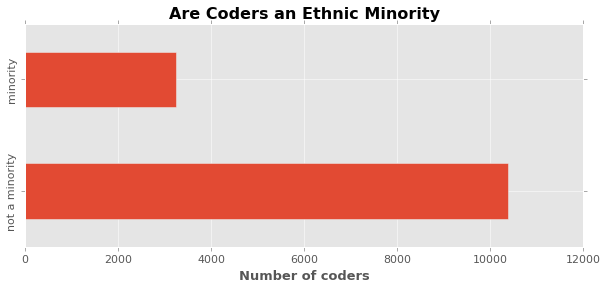

In [20]:
ax = df.IsEthnicMinority.value_counts(sort=False).plot(kind='barh', figsize=(10,4))

_ = (ax.set_title('Are Coders an Ethnic Minority'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["not a minority", 'minority'], rotation=90)
    )

## Education

### School Degree

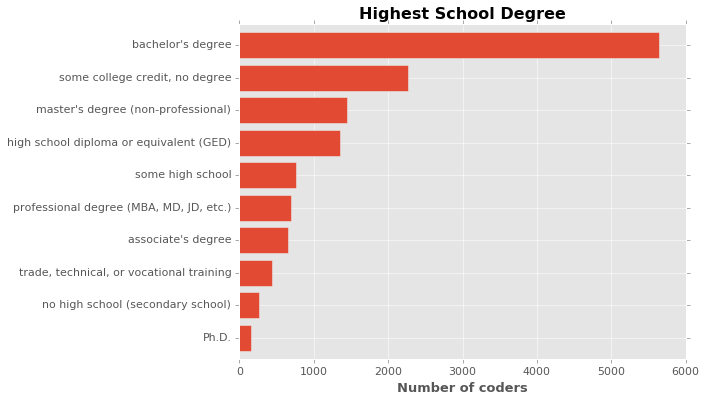

In [21]:
ax = df.SchoolDegree.value_counts(ascending=True).plot(kind='barh', figsize=(8,6), width=0.8)

_ = (ax.set_title('Highest School Degree'), 
     ax.set_xlabel('Number of coders'),    
    )

### School Major

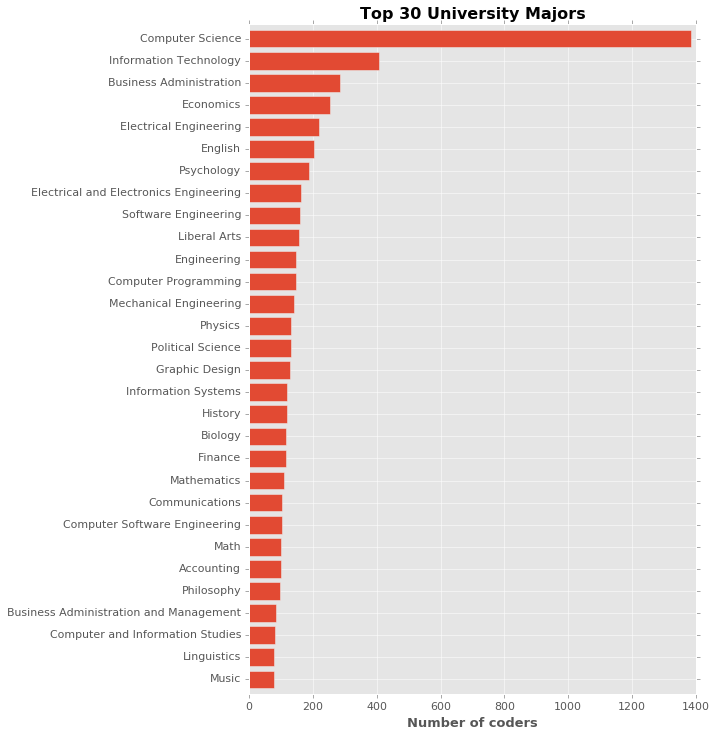

In [22]:
major = df.SchoolMajor.value_counts(ascending=True)[-30:]

ax = major.plot(kind='barh', figsize=(8,12), width=0.8)
_ = (ax.set_title('Top 30 University Majors'), 
     ax.set_xlabel('Number of coders'))

### Hours Learning

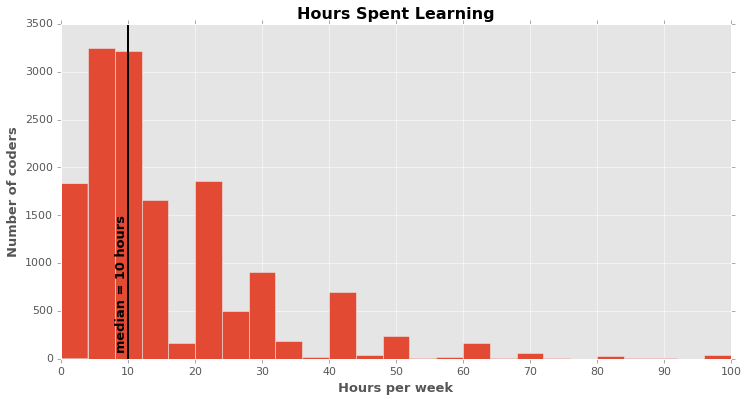

In [23]:
ax = df.HoursLearning.hist(bins=25)

_ = (ax.set_title('Hours Spent Learning'),
     ax.set_xlabel('Hours per week'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 100, 11))
    )

hours_median = df.HoursLearning.median()

_ = (ax.axvline(hours_median, color='black', linewidth=2), 
     ax.text(hours_median, 60, 
             'median = {:.0f} hours'.format(hours_median), 
             rotation=90, fontsize=13, fontweight='bold', 
             horizontalalignment='right', verticalalignment='bottom')
    )

### Money For Learning

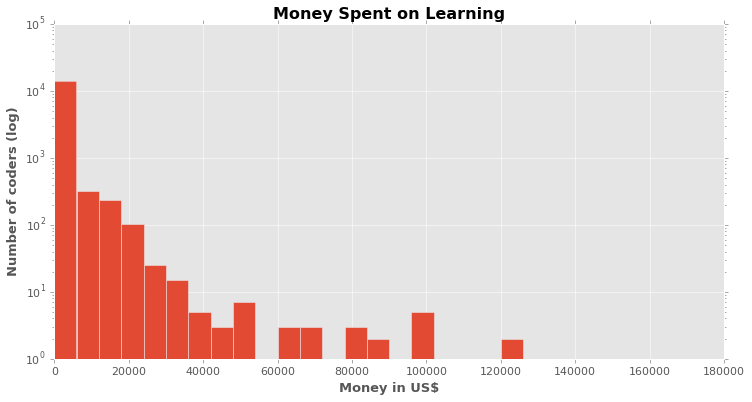

In [24]:
ax = df.MoneyForLearning.hist(bins=30, log=True)
_ = (ax.set_title('Money Spent on Learning'),
     ax.set_xlabel('Money in US$'),
     ax.set_ylabel('Number of coders (log)'),
    )

A large majority (the above histogram has a logarithmic y-axis) of coders spent low amount of money on learning. Let's explore the group with $1000 or less:

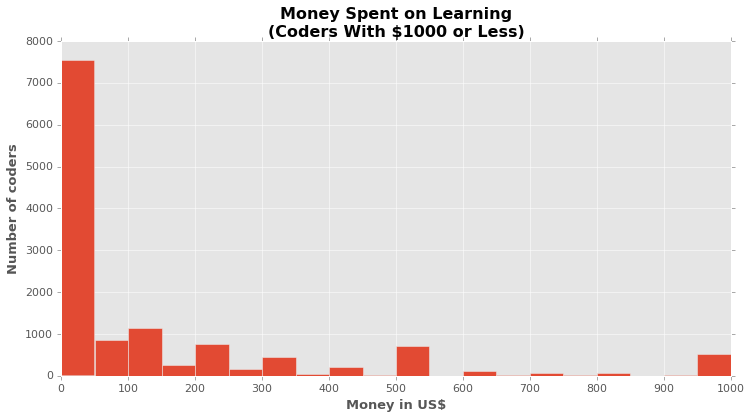

In [25]:
low_money = df.MoneyForLearning[df.MoneyForLearning <= 1000]

ax = low_money.hist(bins=20)
_ = (ax.set_title('Money Spent on Learning\n'
                  '(Coders With $1000 or Less)'),
     ax.set_xlabel('Money in US$'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 1000, 11))
    )

About half of all coders spent little or no money for learning.

### Months Programming

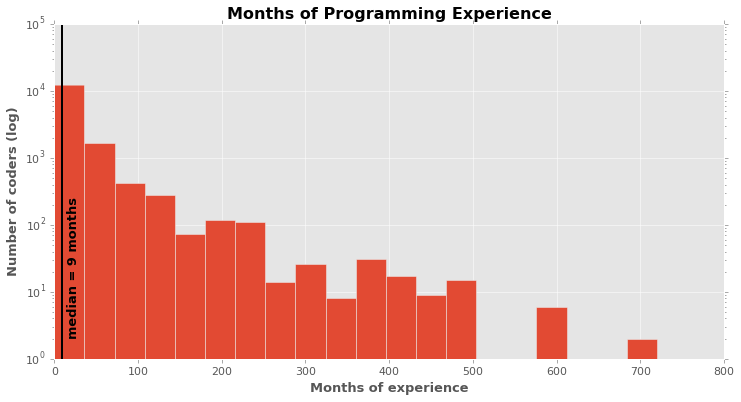

In [26]:
ax = df.MonthsProgramming.hist(bins=20, log=True)
_ = (ax.set_title('Months of Programming Experience'),
     ax.set_xlabel('Months of experience'),
     ax.set_ylabel('Number of coders (log)'))

months_median = df.MonthsProgramming.median()

_ = (ax.axvline(months_median, color='black', linewidth=2), 
     ax.text(months_median+6, 2, 
             'median = {:.0f} months'.format(months_median), 
             rotation=90, fontsize=13, fontweight='bold', 
             horizontalalignment='left', verticalalignment='bottom')
    )

Very skewed distribution (the above histogram has a logarithmic y-axis), so we'll divide coders in two groups: one with 1 year of the experience or less, and other more experienced (we'll limit the max experience to 30 years, so we don't show outliers).

In [27]:
newbies = df.MonthsProgramming[df.MonthsProgramming <= 12]
oldies = df.MonthsProgramming[(df.MonthsProgramming > 12) & (df.MonthsProgramming <= 360)]

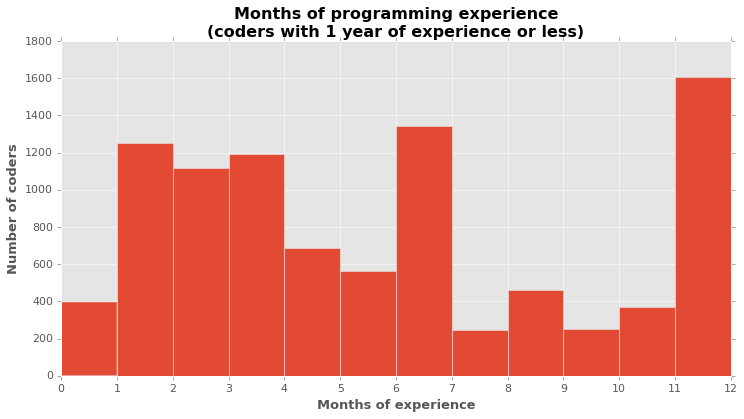

In [28]:
ax = newbies.hist(bins=12)
_ = (ax.set_title('Months of programming experience\n'
                  '(coders with 1 year of experience or less)'),
     ax.set_xlabel('Months of experience'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 12, 13)),
    )

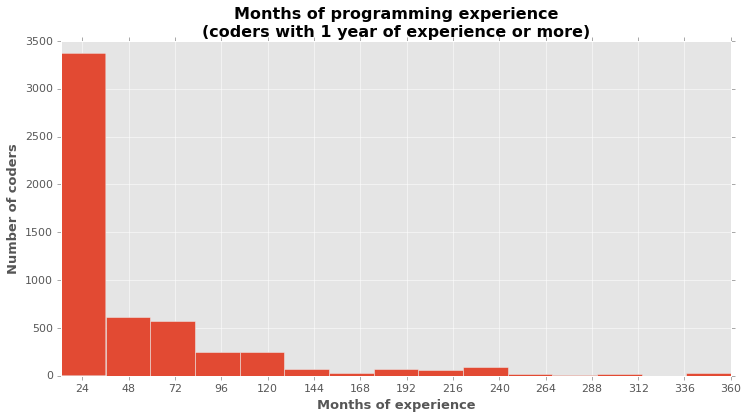

In [29]:
ax = oldies.hist(bins=15)
_ = (ax.set_title('Months of programming experience\n'
                  '(coders with 1 year of experience or more)'),
     ax.set_xlabel('Months of experience'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 360, 16)),
     ax.set_xlim((13, 360)),
    )

## Jobs and Employment

### Employment Status

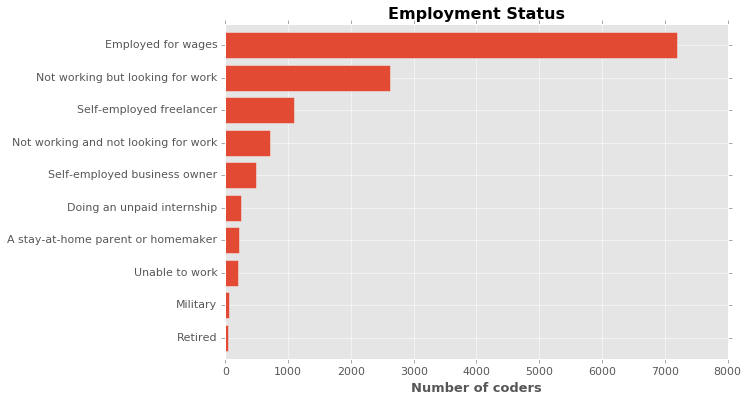

In [30]:
employment = df.EmploymentStatus.value_counts(ascending=True)

ax = employment.plot(kind='barh', figsize=(9,6), width=0.8)
_ = (ax.set_title('Employment Status'),
     ax.set_xlabel('Number of coders'))

### Software Developers

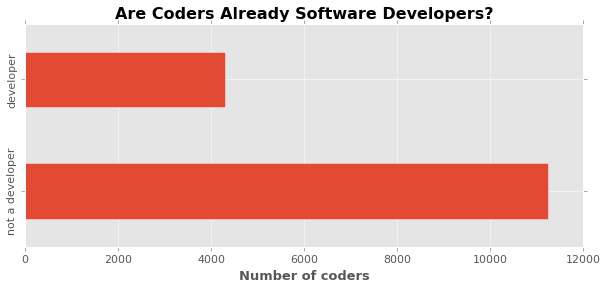

In [31]:
devs = df.IsSoftwareDev.value_counts(sort=False)

ax = devs.plot(kind='barh', figsize=(10,4))
_ = (ax.set_title('Are Coders Already Software Developers?'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["not a developer", 'developer'], rotation=90)
    )

### Employment Field

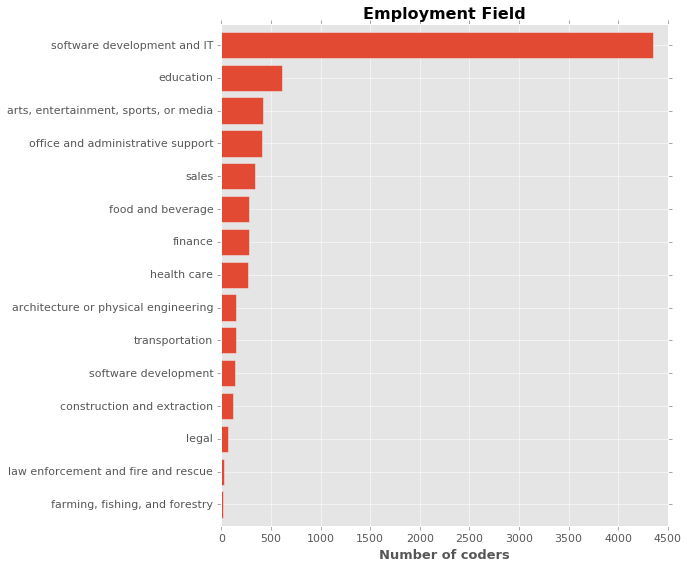

In [32]:
field = df.EmploymentField.value_counts(ascending=True)

ax = field.plot(kind='barh', figsize=(8,9), width=0.8)
_ = (ax.set_title('Employment Field'),
     ax.set_xlabel('Number of coders'),
    )

### Under Employment

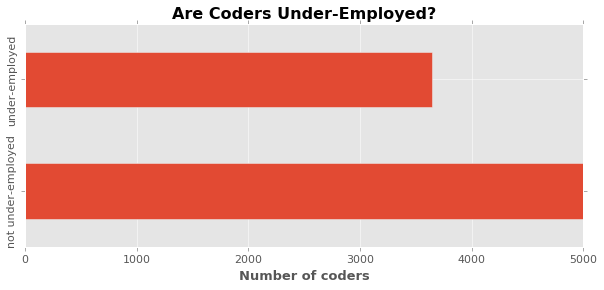

In [33]:
under = df.IsUnderEmployed.value_counts(sort=False)

ax = under.plot(kind='barh', figsize=(10,4))
_ = (ax.set_title('Are Coders Under-Employed?'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["not under-employed", 'under-employed'], rotation=90)
    )

### Debt

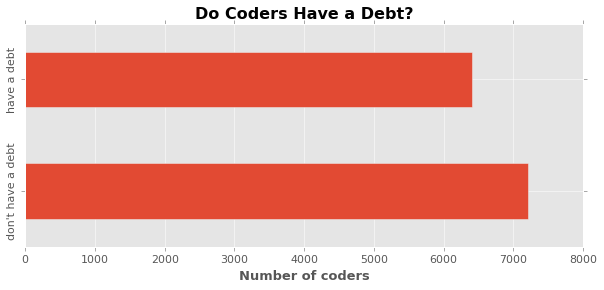

In [34]:
ax = df.HasDebt.value_counts(sort=False).plot(kind='barh', figsize=(10,4))
_ = (ax.set_title('Do Coders Have a Debt?'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["don't have a debt", 'have a debt'], rotation=90)
    )

### Income

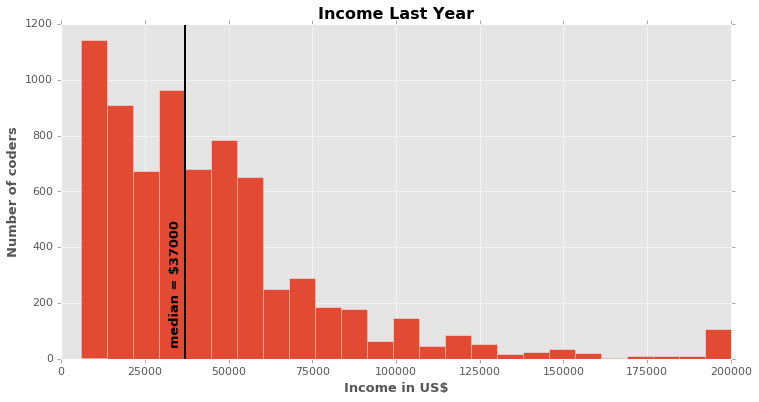

In [35]:
ax = df.Income.hist(bins=25)
_ = (ax.set_title('Income Last Year'),
     ax.set_xlabel('Income in US$'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 200000, 9))
    )

income_median = df.Income.median()

_ = (ax.axvline(income_median, color='black', linewidth=2), 
     ax.text(income_median-1000, 40, 
             'median = ${:.0f}'.format(income_median), 
             rotation=90, fontsize=13, fontweight='bold', 
             horizontalalignment='right', verticalalignment='bottom')
    )

### Expected Earning

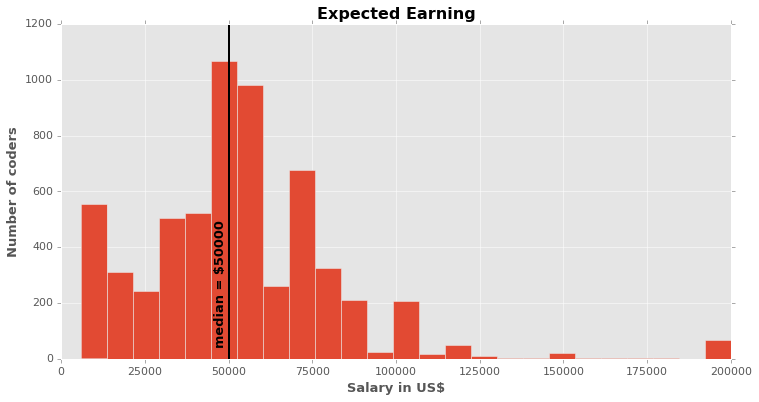

In [36]:
ax = df.ExpectedEarning.hist(bins=25)
_ = (ax.set_title('Expected Earning'),
     ax.set_xlabel('Salary in US$'),
     ax.set_ylabel('Number of coders'),
     ax.set_xticks(np.linspace(0, 200000, 9)))

expected_median = df.ExpectedEarning.median()

_ = (ax.axvline(expected_median, color='black', linewidth=2), 
     ax.text(expected_median-500, 40, 
             'median = ${:.0f}'.format(expected_median), 
             rotation=90, fontsize=13, fontweight='bold', 
             horizontalalignment='right', verticalalignment='bottom'))

### Job Applying Time

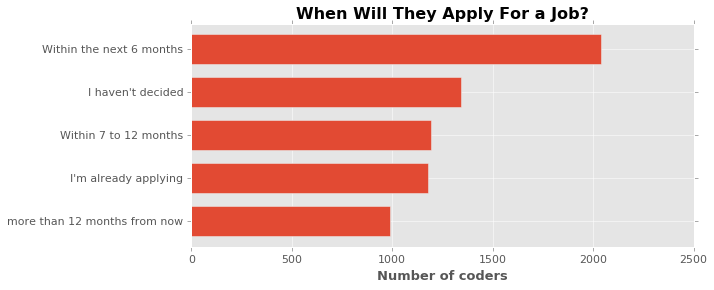

In [37]:
ax = df.JobApplyWhen.value_counts(ascending=True).plot(kind='barh', figsize=(9,4), width=0.7)
_ = (ax.set_title('When Will They Apply For a Job?'),
     ax.set_xlabel('Number of coders'),
    )

### Job Preference

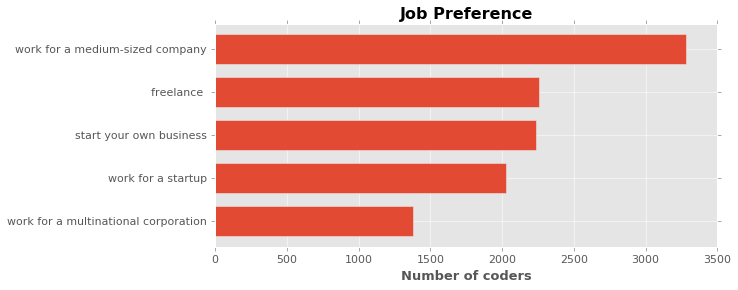

In [38]:
ax = df.JobPref.value_counts(ascending=True).plot(kind='barh', figsize=(9,4), width=0.7)
_ = (ax.set_title('Job Preference'),
     ax.set_xlabel('Number of coders'),
    )

### Job Role Interest

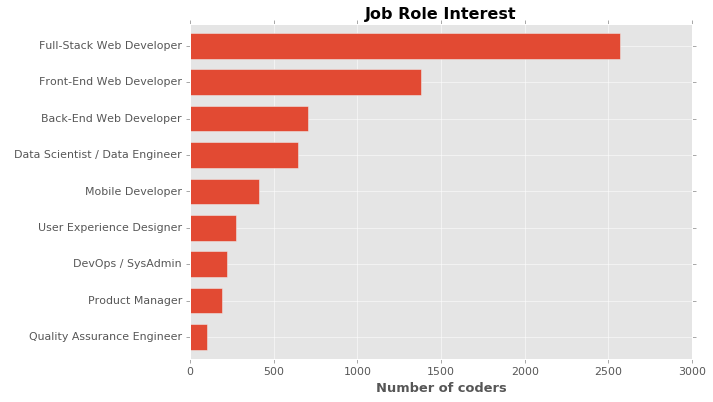

In [39]:
ax = df.JobRoleInterest.value_counts(ascending=True).plot(kind='barh', figsize=(9,6), width=0.7)
_ = (ax.set_title('Job Role Interest'),
     ax.set_xlabel('Number of coders'),
    )

### Job Location

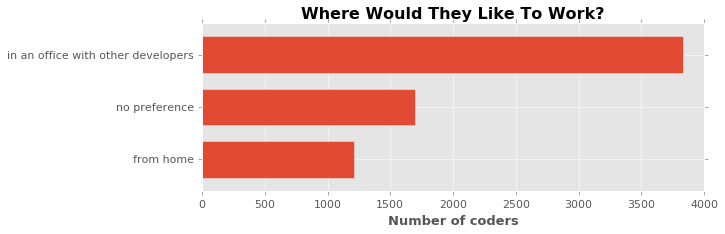

In [40]:
ax = df.JobWherePref.value_counts(ascending=True).plot(kind='barh', figsize=(9,3), width=0.7)
_ = (ax.set_title('Where Would They Like To Work?'),
     ax.set_xlabel('Number of coders'),
    )

### Job Relocation

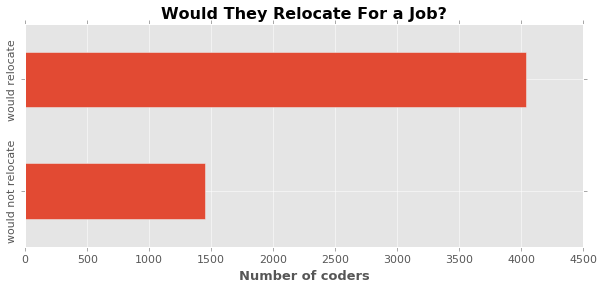

In [41]:
ax = df.JobRelocateYesNo.value_counts(sort=False).plot(kind='barh', figsize=(10,4))

_ = (ax.set_title('Would They Relocate For a Job?'),
     ax.set_xlabel('Number of coders'),
     ax.set_yticklabels(["would not relocate", 'would relocate'], rotation=90)
    )

It looks like majority would be willing to relocate, but only 1/3 of the coders answered this question.

# Part II

For part II (multivariate analysis) click [here](./new_coders-part2.ipynb).

&nbsp;

&nbsp;


#### Notebook Style

In [1]:
from IPython.core.display import HTML
def css_styling(): 
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()